In [1]:
"""
This notebook plots predicted and observed tracks for the rs8050061 diQTL (Fig. 3D)
"""

'\nThis notebook plots predicted and observed tracks for the rs8050061 diQTL (Fig. 3D)\n'

In [4]:
import numpy as np
import pyfastx
import os
import h5py
import sys
sys.path.append("../../clipnet")
from utils import plot_side

In [5]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set SCRATCH to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "example_tracks_and_deepshap.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR}")

wget https://zenodo.org/records/10597358/files/example_tracks_and_deepshap.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/example_tracks_and_deepshap.tar.gz


In [71]:
# Load data

# Experimental
y = np.load(
    os.path.join(SCRATCH, "example_tracks_and_deepshap/concat_procap.npz")
)["arr_0"][:, np.r_[250:750, 1250:1750]]

# Predicted
mean_tracks = {}
for n in [5, 10, 15, 20, 30]:
    y_pred_scaled = []
    for r in range(5):
        prediction = h5py.File(
            os.path.join(SCRATCH, f"example_tracks_and_deepshap/n{n}_run{r}_fold_7_examples_prediction.h5")
        )
        tracks = prediction["track"]
        quantity = prediction["quantity"]
        y_norm = tracks / np.array(tracks).sum(axis=1, keepdims=True)
        y_pred_scaled.append(y_norm * quantity)
    y_pred = np.array(y_pred_scaled)
    mean_tracks[n] = y_pred

/var/folders/sd/3462tpx12fbfxc_f8swcwyf40000gp/T/ipykernel_36546/1693760900.py:18: RuntimeWarning: invalid value encountered in divide
  y_norm = tracks / np.array(tracks).sum(axis=1, keepdims=True)


In [73]:
# Divide individuals by genotype:

fasta = pyfastx.Fasta(os.path.join(SCRATCH, "example_tracks_and_deepshap/concat_sequence.fna.gz"))
seq_coords = [seq.name.split("_")[-1] for seq in fasta]

rs8050061_coord = "chr16:80231439-80232438"
rs8050061_seqs = [i for i in range(len(fasta)) if seq_coords[i] == rs8050061_coord]

c_pred = {n: np.mean([mean_tracks[n][0, i, :] for i in rs8050061_seqs if fasta[i].seq[500] == "C"], axis=0) for n in mean_tracks}
c_expt = np.mean([y[i, :] for i in rs8050061_seqs if fasta[i].seq[500] == "C"], axis=0)
t_pred = {n: np.mean([mean_tracks[n][0, i, :] for i in rs8050061_seqs if fasta[i].seq[500] == "T"], axis=0) for n in mean_tracks}
t_expt = np.mean([y[i, :] for i in rs8050061_seqs if fasta[i].seq[500] == "T"], axis=0)

In [74]:
c_pred[5].shape

(1000,)

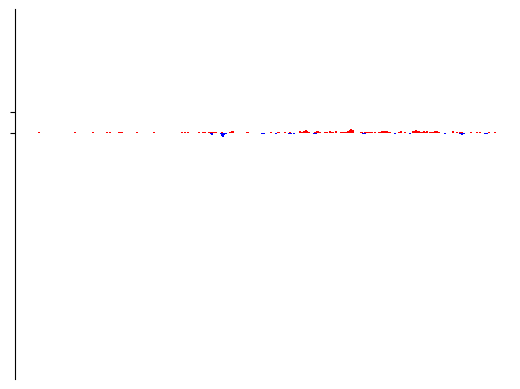

In [75]:
plot_side(c_pred[5], ylim=[-6, 3], yticks=[0, 0.5])#, pic_name="img/model_fold_7_rs8050061C_pred.pdf")

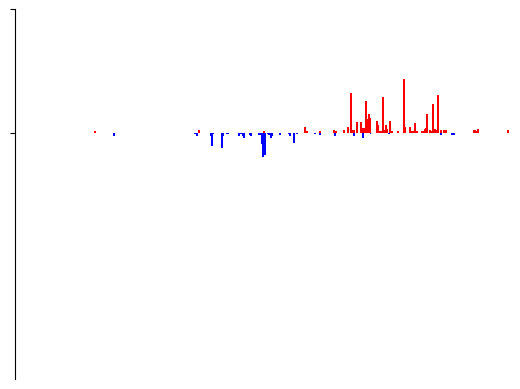

In [76]:
plot_side(c_expt, ylim=[-0.5, 0.25], yticks=[0, 0.25])#, pic_name="img/model_fold_7_rs8050061C_expt.pdf")

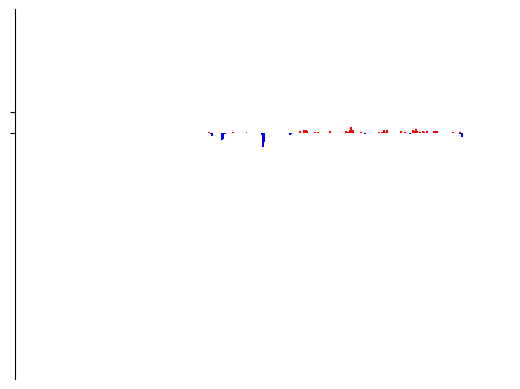

In [77]:
plot_side(t_pred[5], ylim=[-6, 3], yticks=[0, 0.5])#, pic_name="img/model_fold_7_rs8050061T_pred.pdf")

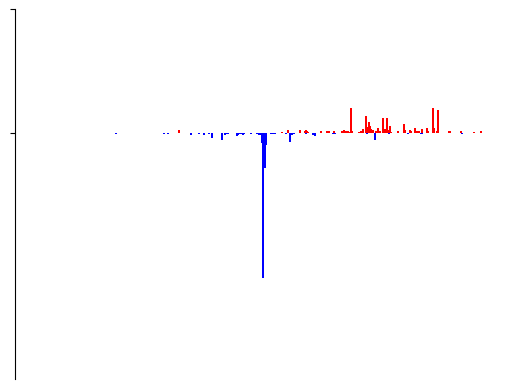

In [78]:
plot_side(t_expt, ylim=[-0.5, 0.25], yticks=[0, 0.25])#, pic_name="img/model_fold_7_rs8050061T_expt.pdf")